In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA


### 1. Loading and Preparing Data for Analysis

In [5]:
data = pd.read_csv("../data/rfm.csv")

# Vérifier les types de données
print(data.dtypes)

customer_id       float64
recency             int64
frequency           int64
monetary          float64
pourcentage       float64
basket_average    float64
dtype: object


In [42]:
# Display data RFM
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     5899 non-null   float64
 1   recency         5899 non-null   int64  
 2   frequency       5899 non-null   int64  
 3   monetary        5899 non-null   float64
 4   pourcentage     5899 non-null   float64
 5   basket_average  5899 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 276.6 KB


In [7]:
# Statistical summary of the RFM
data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,5899.000000,5899.000000,5899.000000,5899.000000,5898.000000,5.899000e+03
mean,15316.746737,201.646042,6.234955,2795.096680,inf,-inf
std,1716.135886,210.914567,12.815370,13823.791103,NaN,NaN
min,12346.000000,1.000000,0.000000,-1343.240000,0.000000,-inf
25%,13831.500000,25.000000,1.000000,327.800000,0.000000,1.705230e+02
50%,15319.000000,95.000000,3.000000,837.260000,0.000000,2.709400e+02
75%,16800.500000,380.000000,7.000000,2164.385000,1.541748,4.040507e+02
max,18287.000000,739.000000,379.000000,578408.640000,inf,1.320650e+04


### 3. Visualizing Frequency and Monetary Relationship

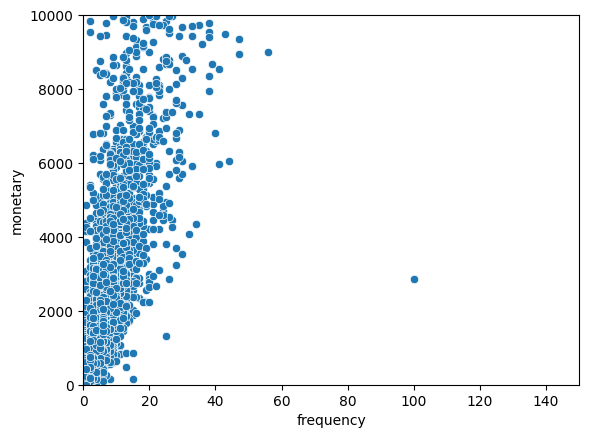

In [9]:
sns.scatterplot(x=data['frequency'], y=data['monetary'])
plt.xlim([0,150])
plt.ylim([0,10000])
plt.show()

### 4. Boxplots for each

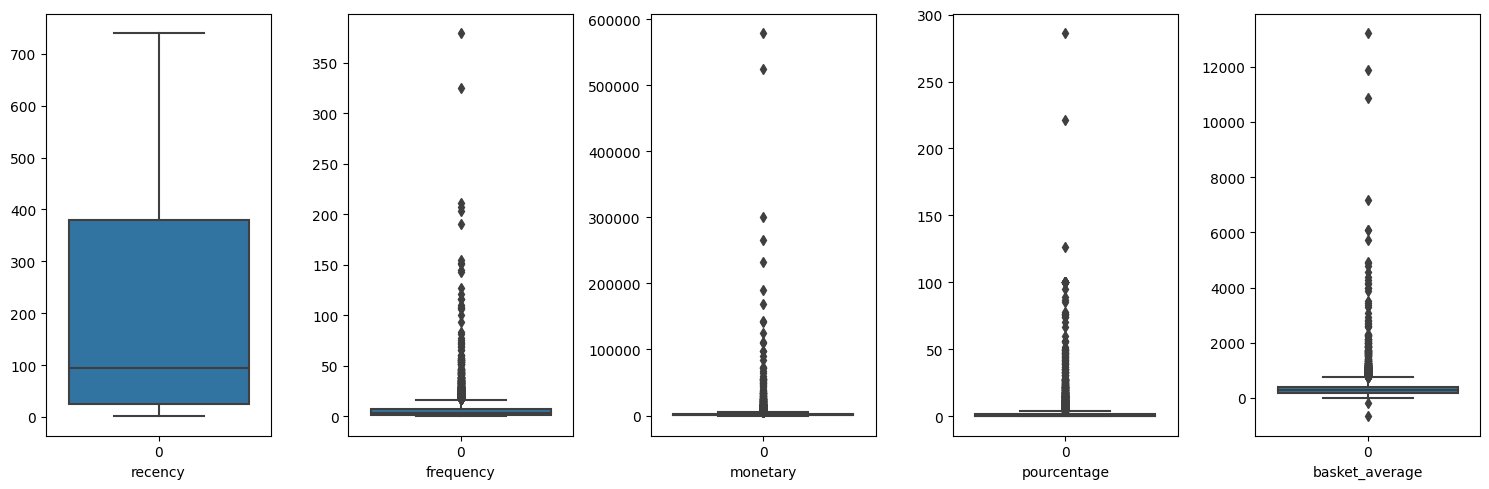

In [31]:
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

# Créer une sous-figure avec plusieurs axes pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourir les variables et tracer les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les boxplots
plt.show()

In [55]:
data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
0,12346.0,326,4,66.86,99.913566,16.71500
1,12347.0,3,8,4921.53,0.000000,615.19125
2,12348.0,76,5,2019.40,0.000000,403.88000
3,12349.0,19,4,4404.54,0.545308,1101.13500
4,12350.0,311,1,334.40,0.000000,334.40000


### 6. Removing Outliers using méthode des Quantiles

In [36]:
# Définir le seuil de suppression des valeurs extrêmes (par exemple, 0.95 pour garder les 95% des observations)
quantile_threshold = 0.95

# Calculer les quantiles pour chaque variable
quantiles = data.quantile(quantile_threshold)

# Appliquer la suppression des valeurs extrêmes pour chaque variable
filtered_data = data[(data <= quantiles).all(axis=1)]

# Afficher les statistiques résumées de l'ensemble de données filtré
filtered_data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,15209.215747,181.824060,4.502969,1381.334566,1.009553,291.473883
std,1617.505804,182.899357,4.096147,1551.247759,2.041202,160.036825
min,12347.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,13811.500000,27.000000,1.000000,340.670000,0.000000,170.673833
50%,15220.000000,90.000000,3.000000,788.460000,0.000000,262.270000
75%,16617.500000,359.000000,6.000000,1793.850000,1.077929,376.173500
max,17991.000000,628.000000,21.000000,8859.820000,11.394443,841.340000


In [60]:
filtered_data = filtered_data.reset_index(drop=True)

In [52]:
quantiles

customer_id       17991.100000
recency             628.100000
frequency            21.000000
monetary           8882.860000
pourcentage          11.395798
basket_average      844.440125
Name: 0.95, dtype: float64

In [54]:
filtered_data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
1,12347.0,3,8,4921.53,0.000000,615.191250
2,12348.0,76,5,2019.40,0.000000,403.880000
4,12350.0,311,1,334.40,0.000000,334.400000
5,12351.0,376,1,300.93,0.000000,300.930000
6,12352.0,37,9,1889.21,5.987938,209.912222


In [50]:
filtered_data.isnull().sum()

customer_id       0
recency           0
frequency         0
monetary          0
pourcentage       0
basket_average    0
dtype: int64

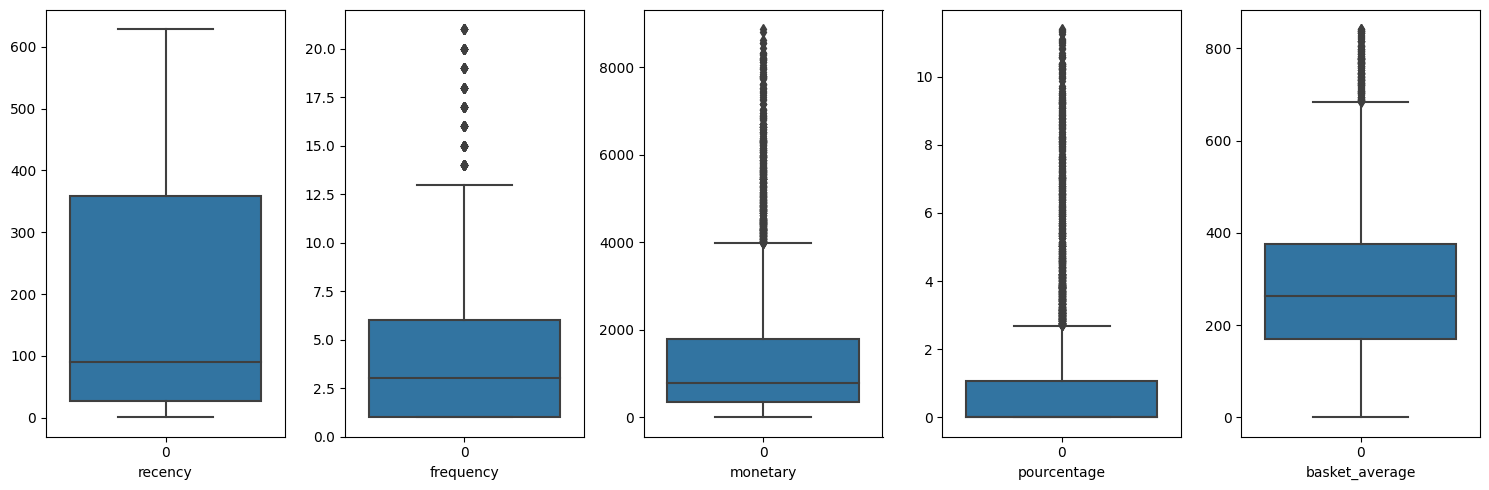

In [62]:
# Spécifiez les colonnes pour les boxplots
c = ['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average']

# Créez une figure avec plusieurs sous-graphiques pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourez les variables et tracez les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=filtered_data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les boxplots
plt.show()

### 7. Scaling the Data

In [69]:
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

#rfms = StandardScaler().fit(data[c]).transform(data[c])
rfms = RobustScaler().fit(filtered_data[c]).transform(filtered_data[c])

rfms = pd.DataFrame(rfms, columns=c)

rfms

,recency,frequency,monetary,pourcentage,basket_average
0,-0.262048,1.0,2.844156,0.000000,1.717381
1,-0.042169,0.4,0.847066,0.000000,0.689101
2,0.665663,-0.4,-0.312460,0.000000,0.350998
3,0.861446,-0.4,-0.335492,0.000000,0.188127
4,-0.159639,1.2,0.757477,5.555038,-0.254783
...,...,...,...,...,...
4542,0.289157,0.4,0.069819,7.256822,-0.410152
4543,-0.234940,2.0,-0.215197,1.900525,-1.098175
4544,0.873494,-0.4,-0.399902,0.000000,-0.267348
4545,0.442771,0.6,0.505175,0.306075,-0.041403


### 8. ACP

In [70]:
pca=PCA(n_components=2)
pc=pca.fit_transform(rfms)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
pdf.head()

,principal component 1,principal component 2
0,-0.325713,2.980427
1,-0.791244,0.813275
2,-1.136152,-0.697712
3,-1.154155,-0.799894
4,4.685056,-0.346586


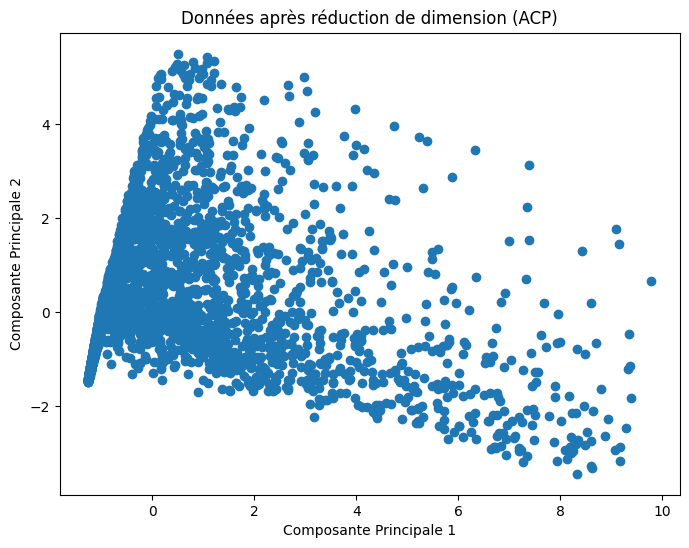

In [77]:
# Créer le graphe
pc1 = pdf['principal component 1']
pc2 = pdf['principal component 2']



plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Données après réduction de dimension (ACP)')
plt.show()

### 9. Clustering Using K-Means

    Evaluating K-Means Performance by Cluster Number

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'KMeans Performance By Cluster Number')

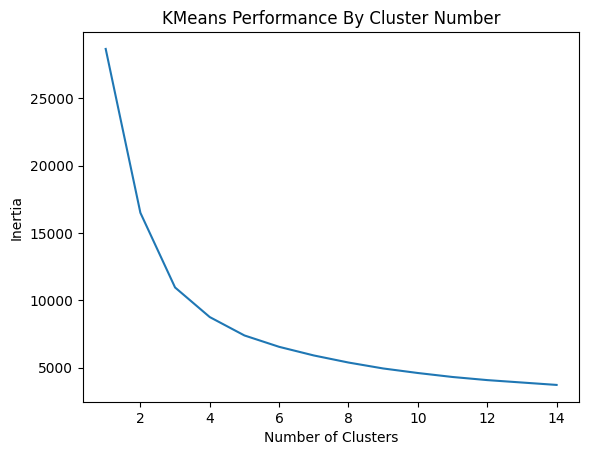

In [71]:
from sklearn.cluster import KMeans

plt.figure(dpi=100)
inertias = []
for i in range(1,15):
    inertias.append(KMeans(n_clusters = i).fit(rfms[c]).inertia_)
plt.plot(range(1,15), inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('KMeans Performance By Cluster Number')

    Assigning Clusters to Customers

In [72]:
kp = pd.Series(KMeans(n_clusters = 4, random_state=10, max_iter=3000).fit(rfms[c]).predict(rfms[c]))
rfms['Cluster'] = kp

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
rfms.Cluster.value_counts()

0    3050
2     736
3     535
1     226
Name: Cluster, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score
# Fit the KMeans model with the number of clusters set to 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(pdf)

# Get the predictions
predictions = kmeans.predict(pdf)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(pdf, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(pdf, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(pdf, predictions)

# Visualize the results in 2D
plt.scatter(pdf[:, 0], pdf[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

    Visualizing Customer Clusters in 3D

    Analyzing Cluster Characteristics
    - Display the means 

In [97]:
rfm[c + ['Cluster']].groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,206.493406,6.237712,1760.730143
1,1.500000,158.500000,546861.340000
2,6.600000,177.500000,178309.048000
3,34.703297,69.912088,34420.602451


    Visualizing Customer Clusters based on Frequency and Monetary

### 9. Analysis of clusters formed

    Average Recency, Frequency and Monetary by Cluster

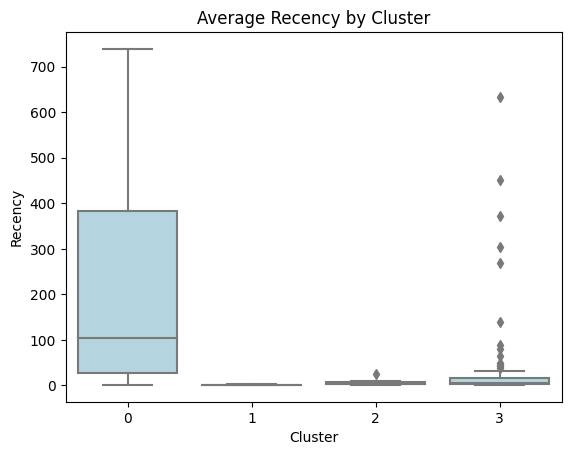

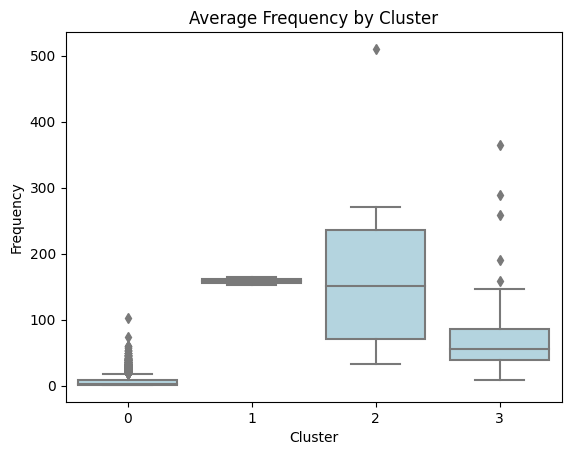

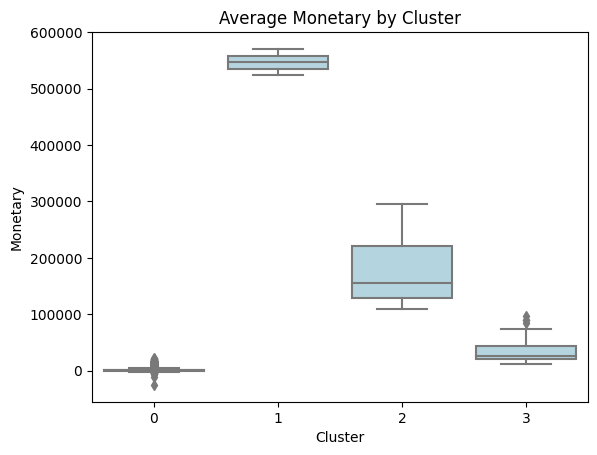

In [103]:
for col in c:
    plt.figure(dpi=100)
    plt.title('Average ' + col + ' by Cluster')
    sns.boxplot(data=rfm, x='Cluster', y=col, color='lightblue' )
    plt.show()

Text(0.5, 1.0, 'Total Monetary Value by Cluster')

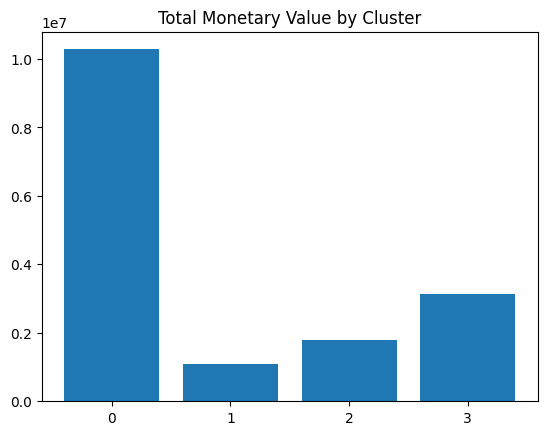

In [102]:
plt.figure(dpi=100)
plt.bar(rfm.groupby('Cluster', as_index=False)['Monetary'].sum().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['Monetary'].sum().Monetary)
plt.title('Total Monetary Value by Cluster')

Text(0, 0.5, 'Number of Customers')

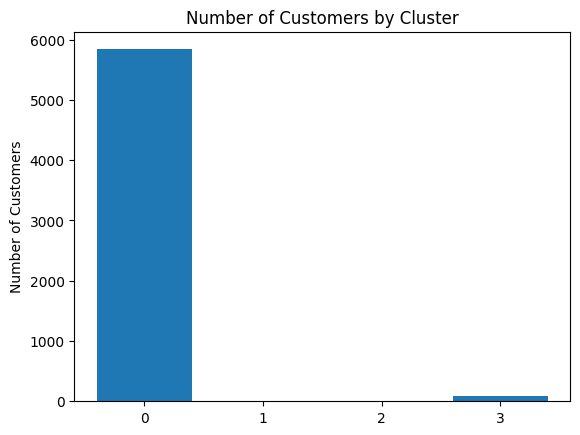

In [101]:
plt.figure(dpi=100)
plt.bar(rfm.groupby('Cluster', as_index=False)['Monetary'].count().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['Monetary'].count().Monetary)
plt.title('Number of Customers by Cluster')
plt.ylabel('Number of Customers')

In [ ]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())
